## Principal Component Analysis
- A data transformation technique converts high-dimensional data to lower-dimensional representation
- The idea is to removed unneccessary information/ features which includes the noise from the input so the model can learn more useful information from important features
- It helps to find another basis or `principal components` to help classify the data better. It is similar to changing the perspective to look at the feature space at a different angle and find the best angle to observe all the variance/ spread in the data
- Data needs to be scaled for PCA to work
- PCA is useful for:
    * Identify hidden (latent) useful features in high dimensional dataset
    * Can be used for data compression, visualisation
    * Speed up training and avoid overfitting the data
    * It was proposed in 1901!

Dataset with large amount of features has the problem which is known as the Curse of Dimensionality. Humans have a hard time visualise or think about high dimensional space. We are so used to 1D, 2D or 3D visualisation. In large dimensional space (100 or 1000 dimensions), things behave quite different with what we know. In high dimensions, the datapoints lies far away from each other. The sparsity of datapoints makes it extremely hard to do prediction or classification since most algorithms rely on points being close together to do extrapolation. In other to compensate for this sparsity, we need exponentially more data to populate the features space. 
There exists a lower k-dimensional space which can be used to describe the original d-dimensional data. 

<center><img src='../assets/pca.png' width="500"></center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from utils import *

We start off by building a 3-D toy dataset, then uses PCA to transform it into 2D dataset

In [3]:
# build the 3D dataset
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

In [4]:
print(X.shape)
print(X[:,0].shape)

(60, 3)
(60,)


Visualise the original 3D dataset

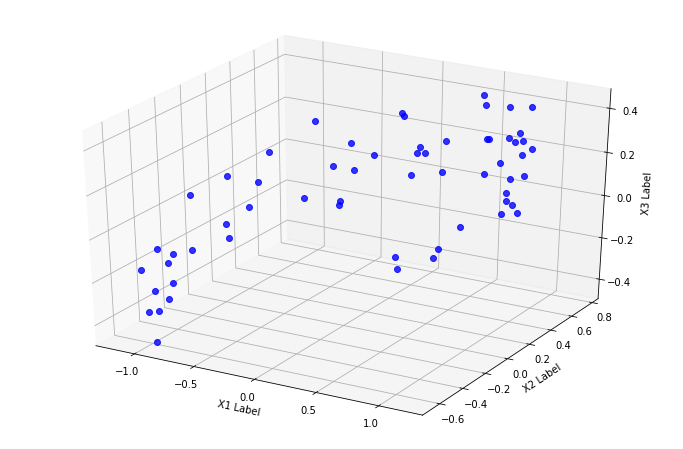

In [5]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')


ax.plot(X[:, 0], X[:, 1], X[:, 2], "bo", alpha=0.8)

ax.set_xlabel('X1 Label')
ax.set_ylabel('X2 Label')
ax.set_zlabel('X3 Label')

plt.show()

Eventhough the data is three dimensional. Most of them can be approximately projected onto a 2D plane. The black vectors are the basis of this plane.

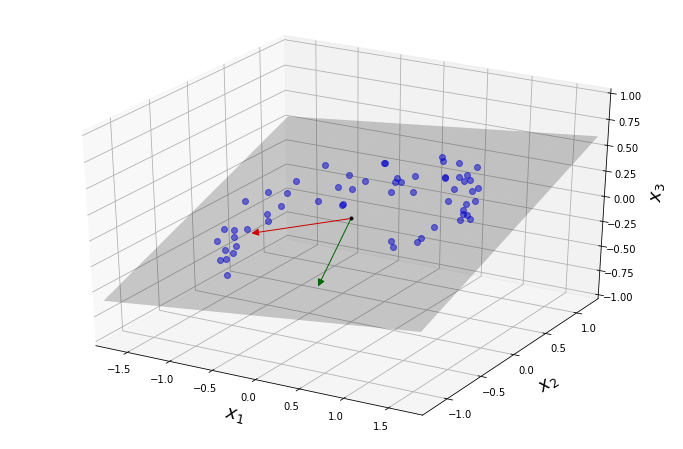

In [6]:
plot_3D(X, figsize=(12,8))

Let's see how to use PCA in scikit-learn to reduce the 3D dataset into a new format with 2 dimensions. 

In [7]:
from sklearn.decomposition import PCA

# set explicitly that we want 2 transformed features
pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

# use this to inverse the process
X3D_inv = pca.inverse_transform(X2D)

There are two main outputs from performing a PCA on a dataset. Firstly it is the list of principal components, and secondly it is how much variance in the original data can be explained by each component. 

In [8]:
pca.components_

array([[-0.93636116, -0.29854881, -0.18465208],
       [ 0.34027485, -0.90119108, -0.2684542 ]])

In [9]:
pca.explained_variance_ratio_

array([0.84248607, 0.14631839])

This can be interpreted as 84.25% of the total variance in the original dataset can be captured if we project the data onto the 1st component. 

In [10]:
# 1st Principal component (red color)
print('First component:', pca.components_.T[ : , 0] )
# 2nd Principal component (green color)
print('Second component:', pca.components_.T[ : , 1] )

First component: [-0.93636116 -0.29854881 -0.18465208]
Second component: [ 0.34027485 -0.90119108 -0.2684542 ]


And this is the projection of the 2D data onto the two new axises Z1 and Z2. As you can see, Z1 and Z2 are the new basis that best describe the variance/ spread of our toy data. The use of z1 and z2 as input to the ML model would be much better and useful than the original axises.

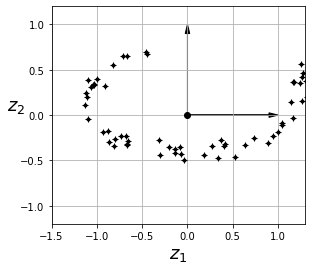

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')

ax.plot(X2D[:, 0], X2D[:, 1], "k+")
ax.plot(X2D[:, 0], X2D[:, 1], "k.")
ax.plot([0], [0], "ko")
ax.arrow(0, 0, 0, 1, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
ax.arrow(0, 0, 1, 0, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
ax.set_xlabel("$z_1$", fontsize=18)
ax.set_ylabel("$z_2$", fontsize=18, rotation=0)
ax.axis([-1.5, 1.3, -1.2, 1.2])
ax.grid(True)

#### Apply PCA on hand-written digits dataset:
- This dataset has 784 features in total. Where each feature is the value of a single pixel. The original image is 2D array with the shape is 28x28. We need to flatten it out to 1D array of 784 values to fit it with a machine learning model. 
- If we examine some images of this dataset, it is easy to see that not all 784 pixels per image are valuable, just the ones in the center actually tell which digit it is. That is what we are trying to figure out using PCA.

In [12]:
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import time
%matplotlib inline


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
from sklearn.metrics import accuracy_score


from sklearn.datasets import fetch_openml

In [13]:
mnist_dataset = fetch_openml('mnist_784', version=1)
# Have to set cache=False to make it work in this version: 0.20.0
# mnist_dataset = fetch_openml('mnist_784', version=1, cache=False)
mnist_dataset.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

Extract the input features X and the target label Y

In [14]:
X, y = mnist_dataset['data'], mnist_dataset['target']
X.shape, y.shape

((70000, 784), (70000,))

An image is a 2-dimensional array of numbers where each of the number represents the "darkness" of the pixel. A value of zero indicates a white pixel and a value of 255 represents a dark pixel. 
Each image in MNIST was flattened out into a vector of size (784,). So in order to view the image in its original form, we need to reshape it back into a 2D matrix.

In [15]:
image_vector = X[0]
digit_image = image_vector.reshape(28, 28)

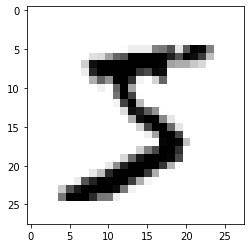

Label for X[0]: 5


In [16]:
# visualise the image to see the digit, this looks like a 5
plt.imshow(digit_image, cmap=mpl.cm.binary)
plt.show()

# let's print out the actual label of this digit
print('Label for X[0]:',y[0]) 
# since y[0] is of type string, we need to convert into integers
y = y.astype(np.uint8)

In [17]:
# Write a function to display an image of the digit so we can reuse it later on
def plot_digit(img_vector):
    digit_image = img_vector.reshape(28, 28)
    plt.imshow(digit_image, cmap=mpl.cm.binary)
    plt.show()

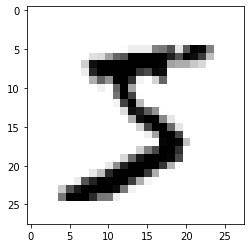

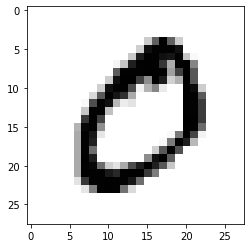

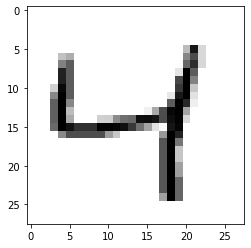

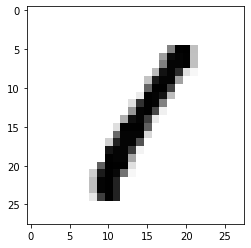

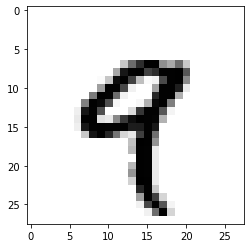

In [18]:
# the first 5 vector does include a variety of digits, so we don't have to shuffle them ourselves
for i in range(5):
    plot_digit(X[i])

In [19]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y)

In [20]:
# load the PCA module, without configuring the number of components
# we are going to figure out the number of components in order to maintain 95% the original total variance
pca = PCA()
pca.fit(X_train)

# Calculate the cumulative sum for all the principal components
cumsum = np.cumsum(pca.explained_variance_ratio_)
# pick d components where cumsum >= 0.95
d = np.argmax(cumsum >= 0.95) + 1
print(d)

154


In [21]:
pca.explained_variance_ratio_

array([9.71983229e-02, 7.15531597e-02, 6.17087597e-02, 5.40174246e-02,
       4.90585458e-02, 4.30277971e-02, 3.27824478e-02, 2.88462948e-02,
       2.74857787e-02, 2.35663184e-02, 2.10814386e-02, 2.04022102e-02,
       1.70600864e-02, 1.68618942e-02, 1.57674392e-02, 1.49316632e-02,
       1.32791957e-02, 1.28490517e-02, 1.18679505e-02, 1.14461496e-02,
       1.06661139e-02, 1.00964406e-02, 9.58792476e-03, 9.02655291e-03,
       8.79314623e-03, 8.35302018e-03, 8.08380275e-03, 7.87543726e-03,
       7.41299284e-03, 6.88475761e-03, 6.55737030e-03, 6.47010663e-03,
       5.98237273e-03, 5.85278397e-03, 5.67335366e-03, 5.45269772e-03,
       5.05393761e-03, 4.89151736e-03, 4.80258720e-03, 4.65998896e-03,
       4.55198041e-03, 4.45293046e-03, 4.16950543e-03, 3.97400939e-03,
       3.84235925e-03, 3.75304115e-03, 3.61879840e-03, 3.48854745e-03,
       3.37779118e-03, 3.21521014e-03, 3.18462190e-03, 3.08913571e-03,
       2.96797984e-03, 2.86653309e-03, 2.82645488e-03, 2.69060489e-03,
      

There are 154 latent features which we can use to train a model instead of 784 original features! And it can describe 95% the total variance.

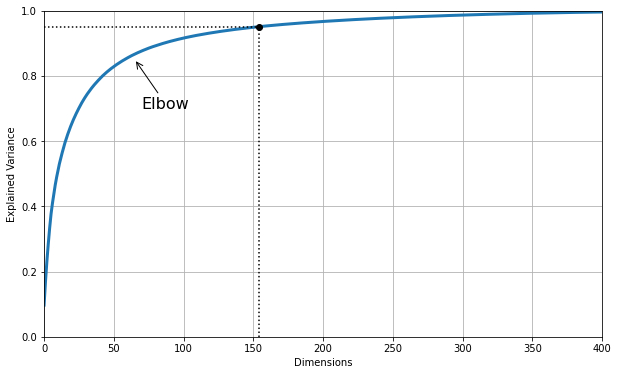

In [22]:
plot_cumsum(cumsum, d)

In [23]:
pca = PCA(n_components = 154)
X_reduced = pca.fit_transform(X_train)

print(X_reduced.shape)

(52500, 154)


In [24]:
pca.components_.shape

(154, 784)

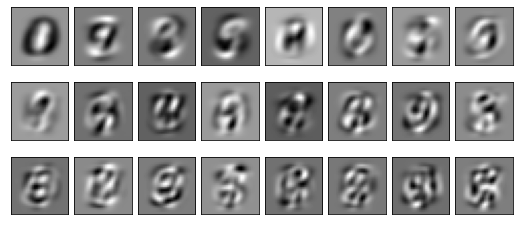

In [25]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(28, 28), cmap=mpl.cm.binary)

In [26]:
X_recovered = pca.inverse_transform(X_reduced)
print(X_recovered.shape)

(52500, 784)


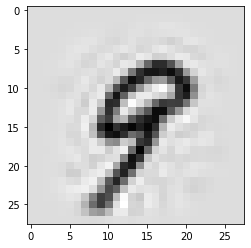

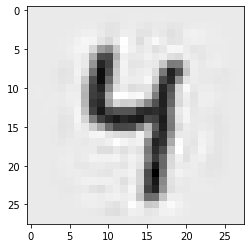

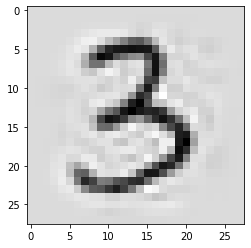

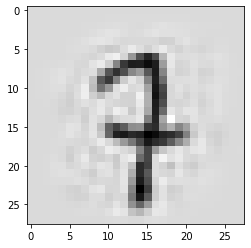

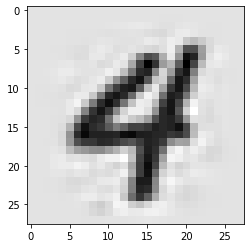

In [27]:
for i in range(5):
    plot_digit(X_recovered[i])

In [28]:
pca = PCA(n_components = 154)
X_reduced = pca.fit_transform(X_train)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

log_clf = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=20000, random_state=42)
t0 = time.time()
log_clf.fit(X_train, y_train)
t1 = time.time()

In [29]:
print("Training took {:.2f}s".format(t1 - t0))

Training took 1096.44s


In [30]:
y_pred = log_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.6914857142857143

Now apply PCA on both train and test data and train again

In [31]:
X_train_reduced = pca.transform(X_train)
X_test_reduced = pca.transform(X_test)

log_clf_pca = LogisticRegression(multi_class="multinomial", solver="lbfgs",max_iter=2000, random_state=42)
t0 = time.time()
log_clf_pca.fit(X_train_reduced, y_train)
t1 = time.time()

print("Training took {:.2f}s".format(t1 - t0))
y_pred = log_clf_pca.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

Training took 10.18s


0.8250285714285714

#### The training is much faster however it comes with the cost of a degraded accuracy. 
- PCA is not the main tool used to improve accuracy. Its purpose is stated at the beginning and it is up to us to see how to leverage those informations for model interpretability, compression as well as visualisation. 